# <a id="inicio"></a> Exercícios Aprendizado Nao Supervisionado - parte 2

-----

### **Autor:** Glauco Lauria Marques Filho

-----

# <a id="resumo"></a> Resumo 

#### Este arquivo contém a resolução dos exercícios da Aula 8 do curso CEDS-808: Aprendizado de Máquina. 

# <a id="sumario"></a> Sumário


* [Início](#inicio)
* [Resumo](#resumo)
* [Sumário](#sumario)
* [Importação de Requisitos](#requisitos)

- 1 [Dados e Informacoes de Entrada](#item_1)
- 1.a [Apriori Manualmente](#item_1_a)
- 1.b [FP-Growth Manualmente](#item_1_b)
- 1.c [Confirmacao com Mixtend](#item_1_c)

# <a id="requisitos"></a> Importação de Requisitos

In [110]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth
from itertools import combinations

# <a id="item_1"></a> 1. Dados e Informacoes de Entrada

In [81]:
transacoes = [
    ['biscoito', 'cerveja', 'pão', 'salaminho'],
    ['cerveja', 'couve', 'linguiça', 'pão', 'queijo'],
    ['café', 'brócolis', 'couve', 'pão'],
    ['brócolis', 'café', 'cerveja', 'couve', 'pão', 'salaminho'],
    ['brócolis', 'café', 'couve', 'pão', 'refrigerante'],
    ['couve', 'linguiça']
]
suporte = 2
confianca = 0.6

# <a id="item_1_a"></a> 1.a. Apriori Manualmente

### Resultados obtidos (Calculos abaixo)

In [82]:
nivel_1 = {
'cerveja': 3,
 'pão': 5,
 'salaminho': 2,
 'couve': 5,
 'linguiça': 2,
 'café': 3,
 'brócolis': 3
}

nivel_2 = {
 ('cerveja', 'pão'): 3,
 ('cerveja', 'salaminho'): 2,
 ('cerveja', 'couve'): 2,
 ('pão', 'salaminho'): 2,
 ('pão', 'couve'): 4,
 ('pão', 'café'): 3,
 ('pão', 'brócolis'): 3,
 ('couve', 'linguiça'): 2,
 ('couve', 'café'): 3,
 ('couve', 'brócolis'): 3,
 ('café', 'brócolis'): 3
}

associacao_nivel_2 = {
 'cerveja - > pão': 1.0,
 'cerveja - > salaminho': 0.6666666666666666,
 'salaminho - > cerveja': 1.0,
 'cerveja - > couve': 0.6666666666666666,
 'salaminho - > pão': 1.0,
 'pão - > couve': 0.8,
 'couve - > pão': 0.8,
 'café - > pão': 1.0,
 'brócolis - > pão': 1.0,
 'linguiça - > couve': 1.0,
 'café - > couve': 1.0,
 'brócolis - > couve': 1.0,
 'café - > brócolis': 1.0,
 'brócolis - > café': 1.0
}

nivel_3 = {
 ('cerveja', 'pão', 'salaminho'): 2,
 ('cerveja', 'pão', 'couve'): 2,
 ('pão', 'couve', 'café'): 3,
 ('pão', 'couve', 'brócolis'): 3,
 ('pão', 'café', 'brócolis'): 3,
 ('couve', 'café', 'brócolis'): 3
}

associacao_nivel_3 = {
 'pão e salaminho - > cerveja': 1.0,
 'salaminho e cerveja - > pão': 1.0,
 'cerveja e pão - > salaminho': 0.6666666666666666,
 'couve e cerveja - > pão': 1.0,
 'cerveja e pão - > couve': 0.6666666666666666,
 'couve e café - > pão': 1.0,
 'café e pão - > couve': 1.0,
 'pão e couve - > café': 0.75,
 'couve e brócolis - > pão': 1.0,
 'brócolis e pão - > couve': 1.0,
 'pão e couve - > brócolis': 0.75,
 'café e brócolis - > pão': 1.0,
 'brócolis e pão - > café': 1.0,
 'pão e café - > brócolis': 1.0,
 'café e brócolis - > couve': 1.0,
 'brócolis e couve - > café': 1.0,
 'couve e café - > brócolis': 1.0
}

nivel_4 = {
 ('pão', 'couve', 'café', 'brócolis'): 3
}

associacao_nivel_4 = {
 'couve e café e brócolis - > pão': 1.0,
 'pão e café e brócolis - > couve': 1.0,
 'pão e couve e brócolis - > café': 1.0,
 'pão e couve e café - > brócolis': 1.0
}


---


### Calculos manuais

In [83]:
freq_itens = {}

for transacao in transacoes:
    for item in transacao:
        if item in freq_itens:
            freq_itens[item] = freq_itens[item] + 1
        else:
            freq_itens[item] = 1

In [84]:
freq_itens

{'biscoito': 1,
 'cerveja': 3,
 'pão': 5,
 'salaminho': 2,
 'couve': 5,
 'linguiça': 2,
 'queijo': 1,
 'café': 3,
 'brócolis': 3,
 'refrigerante': 1}

In [85]:
freq_itens_nivel_1 = freq_itens.copy()
for key, value in freq_itens.items():
    if value < suporte:
        del freq_itens_nivel_1[key]

In [86]:
freq_itens_nivel_1

{'cerveja': 3,
 'pão': 5,
 'salaminho': 2,
 'couve': 5,
 'linguiça': 2,
 'café': 3,
 'brócolis': 3}

In [87]:
chaves_freq_itens_nivel_1 = list(freq_itens_nivel_1.keys())
permutacoes = combinations(chaves_freq_itens_nivel_1, 2)
chaves_freq_itens_nivel_2 = list(permutacoes)
chaves_freq_itens_nivel_2

[('cerveja', 'pão'),
 ('cerveja', 'salaminho'),
 ('cerveja', 'couve'),
 ('cerveja', 'linguiça'),
 ('cerveja', 'café'),
 ('cerveja', 'brócolis'),
 ('pão', 'salaminho'),
 ('pão', 'couve'),
 ('pão', 'linguiça'),
 ('pão', 'café'),
 ('pão', 'brócolis'),
 ('salaminho', 'couve'),
 ('salaminho', 'linguiça'),
 ('salaminho', 'café'),
 ('salaminho', 'brócolis'),
 ('couve', 'linguiça'),
 ('couve', 'café'),
 ('couve', 'brócolis'),
 ('linguiça', 'café'),
 ('linguiça', 'brócolis'),
 ('café', 'brócolis')]

In [88]:
candidatos_freq_itens_nivel_2 = {}
for dupla in chaves_freq_itens_nivel_2:
    for transacao in transacoes:
        if dupla[0] in transacao and dupla[1] in transacao:
            if dupla in candidatos_freq_itens_nivel_2:
                candidatos_freq_itens_nivel_2[dupla] = candidatos_freq_itens_nivel_2[dupla] + 1
            else:
                candidatos_freq_itens_nivel_2[dupla] = 1
candidatos_freq_itens_nivel_2

{('cerveja', 'pão'): 3,
 ('cerveja', 'salaminho'): 2,
 ('cerveja', 'couve'): 2,
 ('cerveja', 'linguiça'): 1,
 ('cerveja', 'café'): 1,
 ('cerveja', 'brócolis'): 1,
 ('pão', 'salaminho'): 2,
 ('pão', 'couve'): 4,
 ('pão', 'linguiça'): 1,
 ('pão', 'café'): 3,
 ('pão', 'brócolis'): 3,
 ('salaminho', 'couve'): 1,
 ('salaminho', 'café'): 1,
 ('salaminho', 'brócolis'): 1,
 ('couve', 'linguiça'): 2,
 ('couve', 'café'): 3,
 ('couve', 'brócolis'): 3,
 ('café', 'brócolis'): 3}

In [89]:
freq_itens_nivel_2 = candidatos_freq_itens_nivel_2.copy()
for key, value in candidatos_freq_itens_nivel_2.items():
    if value < suporte:
        del freq_itens_nivel_2[key]
freq_itens_nivel_2

{('cerveja', 'pão'): 3,
 ('cerveja', 'salaminho'): 2,
 ('cerveja', 'couve'): 2,
 ('pão', 'salaminho'): 2,
 ('pão', 'couve'): 4,
 ('pão', 'café'): 3,
 ('pão', 'brócolis'): 3,
 ('couve', 'linguiça'): 2,
 ('couve', 'café'): 3,
 ('couve', 'brócolis'): 3,
 ('café', 'brócolis'): 3}

In [90]:
chaves_freq_itens_nivel_3 = list(freq_itens_nivel_1.keys())
permutacoes = combinations(chaves_freq_itens_nivel_3, 3)
chaves_freq_itens_nivel_3 = list(permutacoes)
chaves_freq_itens_nivel_3

[('cerveja', 'pão', 'salaminho'),
 ('cerveja', 'pão', 'couve'),
 ('cerveja', 'pão', 'linguiça'),
 ('cerveja', 'pão', 'café'),
 ('cerveja', 'pão', 'brócolis'),
 ('cerveja', 'salaminho', 'couve'),
 ('cerveja', 'salaminho', 'linguiça'),
 ('cerveja', 'salaminho', 'café'),
 ('cerveja', 'salaminho', 'brócolis'),
 ('cerveja', 'couve', 'linguiça'),
 ('cerveja', 'couve', 'café'),
 ('cerveja', 'couve', 'brócolis'),
 ('cerveja', 'linguiça', 'café'),
 ('cerveja', 'linguiça', 'brócolis'),
 ('cerveja', 'café', 'brócolis'),
 ('pão', 'salaminho', 'couve'),
 ('pão', 'salaminho', 'linguiça'),
 ('pão', 'salaminho', 'café'),
 ('pão', 'salaminho', 'brócolis'),
 ('pão', 'couve', 'linguiça'),
 ('pão', 'couve', 'café'),
 ('pão', 'couve', 'brócolis'),
 ('pão', 'linguiça', 'café'),
 ('pão', 'linguiça', 'brócolis'),
 ('pão', 'café', 'brócolis'),
 ('salaminho', 'couve', 'linguiça'),
 ('salaminho', 'couve', 'café'),
 ('salaminho', 'couve', 'brócolis'),
 ('salaminho', 'linguiça', 'café'),
 ('salaminho', 'linguiça',

In [91]:
candidatos_freq_itens_nivel_3 = {}
for trio in chaves_freq_itens_nivel_3:
    for transacao in transacoes:
        if trio[0] in transacao and trio[1] in transacao and trio[2] in transacao:
            if trio in candidatos_freq_itens_nivel_3:
                candidatos_freq_itens_nivel_3[trio] = candidatos_freq_itens_nivel_3[trio] + 1
            else:
                candidatos_freq_itens_nivel_3[trio] = 1
candidatos_freq_itens_nivel_3

{('cerveja', 'pão', 'salaminho'): 2,
 ('cerveja', 'pão', 'couve'): 2,
 ('cerveja', 'pão', 'linguiça'): 1,
 ('cerveja', 'pão', 'café'): 1,
 ('cerveja', 'pão', 'brócolis'): 1,
 ('cerveja', 'salaminho', 'couve'): 1,
 ('cerveja', 'salaminho', 'café'): 1,
 ('cerveja', 'salaminho', 'brócolis'): 1,
 ('cerveja', 'couve', 'linguiça'): 1,
 ('cerveja', 'couve', 'café'): 1,
 ('cerveja', 'couve', 'brócolis'): 1,
 ('cerveja', 'café', 'brócolis'): 1,
 ('pão', 'salaminho', 'couve'): 1,
 ('pão', 'salaminho', 'café'): 1,
 ('pão', 'salaminho', 'brócolis'): 1,
 ('pão', 'couve', 'linguiça'): 1,
 ('pão', 'couve', 'café'): 3,
 ('pão', 'couve', 'brócolis'): 3,
 ('pão', 'café', 'brócolis'): 3,
 ('salaminho', 'couve', 'café'): 1,
 ('salaminho', 'couve', 'brócolis'): 1,
 ('salaminho', 'café', 'brócolis'): 1,
 ('couve', 'café', 'brócolis'): 3}

In [92]:
freq_itens_nivel_3 = candidatos_freq_itens_nivel_3.copy()
for key, value in candidatos_freq_itens_nivel_3.items():
    if value < suporte:
        del freq_itens_nivel_3[key]
freq_itens_nivel_3

{('cerveja', 'pão', 'salaminho'): 2,
 ('cerveja', 'pão', 'couve'): 2,
 ('pão', 'couve', 'café'): 3,
 ('pão', 'couve', 'brócolis'): 3,
 ('pão', 'café', 'brócolis'): 3,
 ('couve', 'café', 'brócolis'): 3}

In [93]:
chaves_freq_itens_nivel_4 = list(freq_itens_nivel_1.keys())
permutacoes = combinations(chaves_freq_itens_nivel_4, 4)
chaves_freq_itens_nivel_4 = list(permutacoes)
chaves_freq_itens_nivel_4

[('cerveja', 'pão', 'salaminho', 'couve'),
 ('cerveja', 'pão', 'salaminho', 'linguiça'),
 ('cerveja', 'pão', 'salaminho', 'café'),
 ('cerveja', 'pão', 'salaminho', 'brócolis'),
 ('cerveja', 'pão', 'couve', 'linguiça'),
 ('cerveja', 'pão', 'couve', 'café'),
 ('cerveja', 'pão', 'couve', 'brócolis'),
 ('cerveja', 'pão', 'linguiça', 'café'),
 ('cerveja', 'pão', 'linguiça', 'brócolis'),
 ('cerveja', 'pão', 'café', 'brócolis'),
 ('cerveja', 'salaminho', 'couve', 'linguiça'),
 ('cerveja', 'salaminho', 'couve', 'café'),
 ('cerveja', 'salaminho', 'couve', 'brócolis'),
 ('cerveja', 'salaminho', 'linguiça', 'café'),
 ('cerveja', 'salaminho', 'linguiça', 'brócolis'),
 ('cerveja', 'salaminho', 'café', 'brócolis'),
 ('cerveja', 'couve', 'linguiça', 'café'),
 ('cerveja', 'couve', 'linguiça', 'brócolis'),
 ('cerveja', 'couve', 'café', 'brócolis'),
 ('cerveja', 'linguiça', 'café', 'brócolis'),
 ('pão', 'salaminho', 'couve', 'linguiça'),
 ('pão', 'salaminho', 'couve', 'café'),
 ('pão', 'salaminho', 'cou

In [94]:
candidatos_freq_itens_nivel_4 = {}
for quadra in chaves_freq_itens_nivel_4:
    for transacao in transacoes:
        if quadra[0] in transacao and quadra[1] in transacao and quadra[2] in transacao and quadra[3] in transacao:
            if quadra in candidatos_freq_itens_nivel_4:
                candidatos_freq_itens_nivel_4[quadra] = candidatos_freq_itens_nivel_4[quadra] + 1
            else:
                candidatos_freq_itens_nivel_4[quadra] = 1
candidatos_freq_itens_nivel_4

{('cerveja', 'pão', 'salaminho', 'couve'): 1,
 ('cerveja', 'pão', 'salaminho', 'café'): 1,
 ('cerveja', 'pão', 'salaminho', 'brócolis'): 1,
 ('cerveja', 'pão', 'couve', 'linguiça'): 1,
 ('cerveja', 'pão', 'couve', 'café'): 1,
 ('cerveja', 'pão', 'couve', 'brócolis'): 1,
 ('cerveja', 'pão', 'café', 'brócolis'): 1,
 ('cerveja', 'salaminho', 'couve', 'café'): 1,
 ('cerveja', 'salaminho', 'couve', 'brócolis'): 1,
 ('cerveja', 'salaminho', 'café', 'brócolis'): 1,
 ('cerveja', 'couve', 'café', 'brócolis'): 1,
 ('pão', 'salaminho', 'couve', 'café'): 1,
 ('pão', 'salaminho', 'couve', 'brócolis'): 1,
 ('pão', 'salaminho', 'café', 'brócolis'): 1,
 ('pão', 'couve', 'café', 'brócolis'): 3,
 ('salaminho', 'couve', 'café', 'brócolis'): 1}

In [95]:
freq_itens_nivel_4 = candidatos_freq_itens_nivel_4.copy()
for key, value in candidatos_freq_itens_nivel_4.items():
    if value < suporte:
        del freq_itens_nivel_4[key]
freq_itens_nivel_4

{('pão', 'couve', 'café', 'brócolis'): 3}

In [96]:
chaves_freq_itens_nivel_5 = list(freq_itens_nivel_1.keys())
permutacoes = combinations(chaves_freq_itens_nivel_5, 5)
chaves_freq_itens_nivel_5 = list(permutacoes)
chaves_freq_itens_nivel_5

[('cerveja', 'pão', 'salaminho', 'couve', 'linguiça'),
 ('cerveja', 'pão', 'salaminho', 'couve', 'café'),
 ('cerveja', 'pão', 'salaminho', 'couve', 'brócolis'),
 ('cerveja', 'pão', 'salaminho', 'linguiça', 'café'),
 ('cerveja', 'pão', 'salaminho', 'linguiça', 'brócolis'),
 ('cerveja', 'pão', 'salaminho', 'café', 'brócolis'),
 ('cerveja', 'pão', 'couve', 'linguiça', 'café'),
 ('cerveja', 'pão', 'couve', 'linguiça', 'brócolis'),
 ('cerveja', 'pão', 'couve', 'café', 'brócolis'),
 ('cerveja', 'pão', 'linguiça', 'café', 'brócolis'),
 ('cerveja', 'salaminho', 'couve', 'linguiça', 'café'),
 ('cerveja', 'salaminho', 'couve', 'linguiça', 'brócolis'),
 ('cerveja', 'salaminho', 'couve', 'café', 'brócolis'),
 ('cerveja', 'salaminho', 'linguiça', 'café', 'brócolis'),
 ('cerveja', 'couve', 'linguiça', 'café', 'brócolis'),
 ('pão', 'salaminho', 'couve', 'linguiça', 'café'),
 ('pão', 'salaminho', 'couve', 'linguiça', 'brócolis'),
 ('pão', 'salaminho', 'couve', 'café', 'brócolis'),
 ('pão', 'salaminho'

In [97]:
candidatos_freq_itens_nivel_5 = {}
for quinta in chaves_freq_itens_nivel_5:
    for transacao in transacoes:
        if quinta[0] in transacao and quinta[1] in transacao and quinta[2] in transacao and quinta[3] in transacao and quinta[4] in transacao:
            if quinta in candidatos_freq_itens_nivel_5:
                candidatos_freq_itens_nivel_5[quinta] = candidatos_freq_itens_nivel_5[quinta] + 1
            else:
                candidatos_freq_itens_nivel_5[quinta] = 1
candidatos_freq_itens_nivel_5

{('cerveja', 'pão', 'salaminho', 'couve', 'café'): 1,
 ('cerveja', 'pão', 'salaminho', 'couve', 'brócolis'): 1,
 ('cerveja', 'pão', 'salaminho', 'café', 'brócolis'): 1,
 ('cerveja', 'pão', 'couve', 'café', 'brócolis'): 1,
 ('cerveja', 'salaminho', 'couve', 'café', 'brócolis'): 1,
 ('pão', 'salaminho', 'couve', 'café', 'brócolis'): 1}

In [98]:
freq_itens_nivel_5 = candidatos_freq_itens_nivel_5.copy()
for key, value in candidatos_freq_itens_nivel_5.items():
    if value < suporte:
        del freq_itens_nivel_5[key]
freq_itens_nivel_5

{}

In [99]:
suportes_itens_nivel_2 = {}
for dupla, suporte in freq_itens_nivel_2.items():
    item_1 = dupla[0]
    item_2 = dupla[1]
    numerador = suporte
    denominador_item_1 =  freq_itens_nivel_1[item_1]
    denominador_item_2 =  freq_itens_nivel_1[item_2]
    suportes_itens_nivel_2[f"{item_1} -> {item_2}"] = numerador/denominador_item_1
    suportes_itens_nivel_2[f"{item_2} -> {item_1}"] = numerador/denominador_item_2
suportes_itens_nivel_2 = {chave: valor for chave, valor in suportes_itens_nivel_2.items() if valor > confianca}
suportes_itens_nivel_2

{'cerveja -> pão': 1.0,
 'cerveja -> salaminho': 0.6666666666666666,
 'salaminho -> cerveja': 1.0,
 'cerveja -> couve': 0.6666666666666666,
 'salaminho -> pão': 1.0,
 'pão -> couve': 0.8,
 'couve -> pão': 0.8,
 'café -> pão': 1.0,
 'brócolis -> pão': 1.0,
 'linguiça -> couve': 1.0,
 'café -> couve': 1.0,
 'brócolis -> couve': 1.0,
 'café -> brócolis': 1.0,
 'brócolis -> café': 1.0}

In [100]:
suportes_itens_nivel_3 = {}
for trio, suporte in freq_itens_nivel_3.items():
    item_1 = trio[0]
    item_2 = trio[1]
    item_3 = trio[2]
    numerador = suporte
    try:
        denominador_item_1 =  freq_itens_nivel_2[(item_3,item_2)]
    except:
        denominador_item_1 =  freq_itens_nivel_2[(item_2,item_3)]
    try:
        denominador_item_2 =  freq_itens_nivel_2[(item_1,item_3)]
    except:
        denominador_item_2 =  freq_itens_nivel_2[(item_3,item_1)]
    try:
        denominador_item_3 =  freq_itens_nivel_2[(item_2,item_1)]
    except:
        denominador_item_3 =  freq_itens_nivel_2[(item_1,item_2)]
    suportes_itens_nivel_3[f"{item_2} e {item_3} - > {item_1}"] = numerador/denominador_item_1
    suportes_itens_nivel_3[f"{item_3} e {item_1} - > {item_2}"] = numerador/denominador_item_2
    suportes_itens_nivel_3[f"{item_1} e {item_2} - > {item_3}"] = numerador/denominador_item_3
    
suportes_itens_nivel_3 = {chave: valor for chave, valor in suportes_itens_nivel_3.items() if valor > confianca}
suportes_itens_nivel_3

{'pão e salaminho - > cerveja': 1.0,
 'salaminho e cerveja - > pão': 1.0,
 'cerveja e pão - > salaminho': 0.6666666666666666,
 'couve e cerveja - > pão': 1.0,
 'cerveja e pão - > couve': 0.6666666666666666,
 'couve e café - > pão': 1.0,
 'café e pão - > couve': 1.0,
 'pão e couve - > café': 0.75,
 'couve e brócolis - > pão': 1.0,
 'brócolis e pão - > couve': 1.0,
 'pão e couve - > brócolis': 0.75,
 'café e brócolis - > pão': 1.0,
 'brócolis e pão - > café': 1.0,
 'pão e café - > brócolis': 1.0,
 'café e brócolis - > couve': 1.0,
 'brócolis e couve - > café': 1.0,
 'couve e café - > brócolis': 1.0}

In [101]:
suportes_itens_nivel_4 = {}
for quadra, suporte in freq_itens_nivel_4.items():
    item_1 = quadra[0]
    item_2 = quadra[1]
    item_3 = quadra[2]
    item_4 = quadra[3]
    numerador = suporte
    try:
        denominador_item_1 =  freq_itens_nivel_3[(item_2,item_3,item_4)]
    except:
        try:
            denominador_item_1 =  freq_itens_nivel_3[(item_2,item_4,item_3)]
        except:
            try:
                denominador_item_1 =  freq_itens_nivel_3[(item_3,item_2,item_4)]
            except:
                try:
                    denominador_item_1 =  freq_itens_nivel_3[(item_3,item_4,item_2)]
                except:
                    try:
                        denominador_item_1 =  freq_itens_nivel_3[(item_4,item_2,item_3)]
                    except:
                        denominador_item_1 =  freq_itens_nivel_3[(item_4,item_3,item_2)]
    try:
        denominador_item_2 =  freq_itens_nivel_3[(item_1,item_3,item_4)]
    except:
        try:
            denominador_item_2 =  freq_itens_nivel_3[(item_1,item_4,item_3)]
        except:
            try:
                denominador_item_2 =  freq_itens_nivel_3[(item_3,item_1,item_4)]
            except:
                try:
                    denominador_item_2 =  freq_itens_nivel_3[(item_3,item_4,item_1)]
                except:
                    try:
                        denominador_item_2 =  freq_itens_nivel_3[(item_4,item_1,item_3)]
                    except:
                        denominador_item_2 =  freq_itens_nivel_3[(item_4,item_3,item_1)]

    try:
        denominador_item_3 =  freq_itens_nivel_3[(item_1,item_2,item_4)]
    except:
        try:
            denominador_item_3 =  freq_itens_nivel_3[(item_1,item_4,item_2)]
        except:
            try:
                denominador_item_3 =  freq_itens_nivel_3[(item_2,item_1,item_4)]
            except:
                try:
                    denominador_item_3 =  freq_itens_nivel_3[(item_2,item_4,item_1)]
                except:
                    try:
                        denominador_item_3 =  freq_itens_nivel_3[(item_4,item_1,item_2)]
                    except:
                        denominador_item_3 =  freq_itens_nivel_3[(item_4,item_2,item_1)]

    try:
        denominador_item_4 =  freq_itens_nivel_3[(item_1,item_2,item_3)]
    except:
        try:
            denominador_item_4 =  freq_itens_nivel_3[(item_1,item_3,item_2)]
        except:
            try:
                denominador_item_4 =  freq_itens_nivel_3[(item_2,item_1,item_3)]
            except:
                try:
                    denominador_item_4 =  freq_itens_nivel_3[(item_2,item_3,item_1)]
                except:
                    try:
                        denominador_item_4 =  freq_itens_nivel_3[(item_3,item_1,item_2)]
                    except:
                        denominador_item_4 =  freq_itens_nivel_3[(item_3,item_2,item_1)]
                        

    suportes_itens_nivel_4[f"{item_2} e {item_3} e {item_4} - > {item_1}"] = numerador/denominador_item_1
    suportes_itens_nivel_4[f"{item_1} e {item_3} e {item_4} - > {item_2}"] = numerador/denominador_item_2
    suportes_itens_nivel_4[f"{item_1} e {item_2} e {item_4} - > {item_3}"] = numerador/denominador_item_3
    suportes_itens_nivel_4[f"{item_1} e {item_2} e {item_3} - > {item_4}"] = numerador/denominador_item_4
    
suportes_itens_nivel_4 = {chave: valor for chave, valor in suportes_itens_nivel_4.items() if valor > confianca}
suportes_itens_nivel_4

{'couve e café e brócolis - > pão': 1.0,
 'pão e café e brócolis - > couve': 1.0,
 'pão e couve e brócolis - > café': 1.0,
 'pão e couve e café - > brócolis': 1.0}

---

# <a id="item_1_b"></a> 1.b. FP-Growth Manualmente

In [103]:
transacoes = [
    ['biscoito', 'cerveja', 'pão', 'salaminho'],
    ['cerveja', 'couve', 'linguiça', 'pão', 'queijo'],
    ['café', 'brócolis', 'couve', 'pão'],
    ['brócolis', 'café', 'cerveja', 'couve', 'pão', 'salaminho'],
    ['brócolis', 'café', 'couve', 'pão', 'refrigerante'],
    ['couve', 'linguiça']
]
suporte = 2
confianca = 0.0

ordem_de_frequencias_ordenadas = {
'pão': 5,
'couve': 5,
'cerveja': 3,
'café': 3,
'brócolis': 3,
'salaminho': 2,
'linguiça': 2,
}

novas_transacoes_ordenadas_e_retiradas_minimos = [
    ['pão', 'cerveja', 'salaminho'],
    ['pão', 'couve', 'cerveja', 'linguiça'],
    ['pão', 'couve', 'café', 'brócolis'],
    ['pão', 'couve', 'cerveja', 'café', 'brócolis', 'salaminho'],
    ['pão', 'couve', 'café', 'brócolis'],
    ['couve', 'linguiça']
]
"couve -> linguiça" : 0,
base_condicional_de_padroes = {
'linguiça': {("pão","couve","cerveja"):1,("couve"):1},
'salaminho': {("pão","cerveja"):1,('pão','couve','cerveja','café','brócolis'):1},
'brócolis': {('pão','couve','cerveja','café'):1,('pão','couve','café'):2},
'café': {("pão","couve","cerveja"):1, ("pão","couve"):2},
'cerveja': {("pão"):1, ("pão","couve"):2},
'couve':{("pão"):4},
'pão' : {},
}

arvore_de_frequencia = {
    'linguiça': {("couve"):2},
    'salaminho': {("pão","cerveja"):2},
    'brócolis': {('pão','couve','café'):3},
    'café': {("pão","couve"):3},
    'cerveja': {("pão"):3},
    'couve':{("pão"):4},
    'pão' : {}, 
}

frequencia_gerada = {
    'linguiça': {("couve", 'linguiça'):2},
    'salaminho': {("pão","salaminho"):2,("cerveja","salaminho"):2},
    'brócolis': {('pão','brócolis'):3,('couve','brócolis'):3,('café','brócolis'):3},
    'café': {("pão","café"):3,("couve",'café'):3},
    'cerveja': {("pão",'cerveja'):3},
    'couve':{("pão",'couve'):4},
    'pão' : {},  
}

possiveis_regras_e_confiancas = {
    "couve -> linguiça" : 2/5,
    "linguiça -> couve" : 2/2,
    "pão -> salaminho" : 2/5,
    "salaminho -> pão" : 2/2,
    "cerveja -> salaminho" : 2/3,
    "salaminho -> cerveja" : 2/2,
    "pão -> brócolis" : 3/5,
    "brócolis -> pão" : 3/3,
    "couve -> brócolis" : 3/5,
    "brócolis -> couve" : 3/3,
    "café -> brócolis" : 3/3,
    "brócolis -> café" : 3/3,
    "pão -> café" : 3/5,
    "café -> pão" : 3/3,
    "couve -> café" : 3/5,
    "café -> couve" : 3/3,
    "pão -> cerveja" : 3/5,
    "cerveja -> pão" : 3/3,
    "pão -> couve" : 4/5,
    "couve -> pão" : 4/5,
}



SyntaxError: illegal target for annotation (1284185919.py, line 30)

In [105]:
regras_e_confiancas = {
 'linguica -> couve': 1.0,
 'salaminho -> pao': 1.0,
 'cerveja -> salaminho': 0.6666666666666666,
 'salaminho -> cerveja': 1.0,
 'pao -> brocolis': 0.6,
 'brocolis -> pao': 1.0,
 'couve -> brocolis': 0.6,
 'brocolis -> couve': 1.0,
 'cafe -> brocolis': 1.0,
 'brocolis -> cafe': 1.0,
 'pao -> cafe': 0.6,
 'cafe -> pao': 1.0,
 'couve -> cafe': 0.6,
 'cafe -> couve': 1.0,
 'pao -> cerveja': 0.6,
 'cerveja -> pao': 1.0,
 'pao -> couve': 0.8,
 'couve -> pao': 0.8}
regras_e_confiancas


{'linguica -> couve': 1.0,
 'salaminho -> pao': 1.0,
 'cerveja -> salaminho': 0.6666666666666666,
 'salaminho -> cerveja': 1.0,
 'pao -> brocolis': 0.6,
 'brocolis -> pao': 1.0,
 'couve -> brocolis': 0.6,
 'brocolis -> couve': 1.0,
 'cafe -> brocolis': 1.0,
 'brocolis -> cafe': 1.0,
 'pao -> cafe': 0.6,
 'cafe -> pao': 1.0,
 'couve -> cafe': 0.6,
 'cafe -> couve': 1.0,
 'pao -> cerveja': 0.6,
 'cerveja -> pao': 1.0,
 'pao -> couve': 0.8,
 'couve -> pao': 0.8}

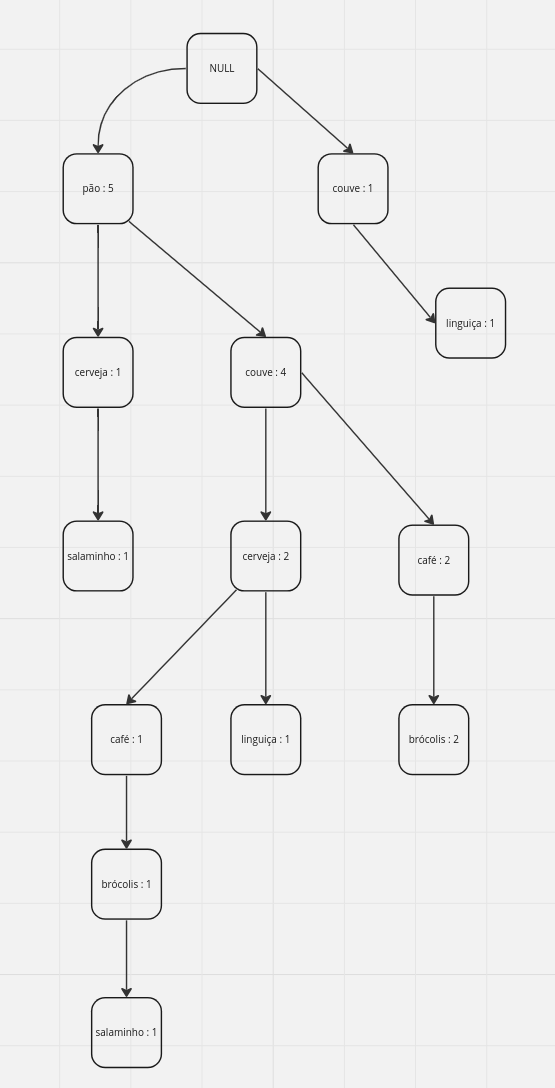

---

# <a id="item_1_c"></a> 1.c. Confirmacao com Mixtend

In [108]:
encoder = TransactionEncoder()
transacoes_encoded = encoder.fit(transacoes).transform(transacoes)
df = pd.DataFrame(transacoes_encoded, columns=encoder.columns_)
itemsets_frequentes = apriori(df, min_support=suporte/6, use_colnames=True)
print(itemsets_frequentes)

     support                      itemsets
0   0.500000                    (brócolis)
1   0.500000                        (café)
2   0.500000                     (cerveja)
3   0.833333                       (couve)
4   0.833333                         (pão)
5   0.500000              (brócolis, café)
6   0.500000             (brócolis, couve)
7   0.500000               (brócolis, pão)
8   0.500000                 (couve, café)
9   0.500000                   (pão, café)
10  0.500000                (pão, cerveja)
11  0.666667                  (pão, couve)
12  0.500000       (brócolis, couve, café)
13  0.500000         (brócolis, pão, café)
14  0.500000        (brócolis, pão, couve)
15  0.500000            (pão, couve, café)
16  0.500000  (brócolis, pão, couve, café)


In [111]:
encoder = TransactionEncoder()
transacoes_encoded = encoder.fit(transacoes).transform(transacoes)
df = pd.DataFrame(transacoes_encoded, columns=encoder.columns_)
conjuntos_frequentes = fpgrowth(df, min_support=suporte/6, use_colnames=True)
print(conjuntos_frequentes)

     support                      itemsets
0   0.833333                         (pão)
1   0.500000                     (cerveja)
2   0.833333                       (couve)
3   0.500000                        (café)
4   0.500000                    (brócolis)
5   0.500000                (pão, cerveja)
6   0.666667                  (pão, couve)
7   0.500000                 (couve, café)
8   0.500000                   (pão, café)
9   0.500000            (pão, couve, café)
10  0.500000              (brócolis, café)
11  0.500000             (brócolis, couve)
12  0.500000               (brócolis, pão)
13  0.500000       (brócolis, couve, café)
14  0.500000         (brócolis, pão, café)
15  0.500000        (brócolis, pão, couve)
16  0.500000  (brócolis, pão, couve, café)
